In [422]:
import os
os.getcwd()

'C:\\Users\\Subba Reddy Yeruva\\Desktop\\New folder\\Train_2\\Train'

In [423]:
os.chdir('C:\\Users\\Subba Reddy Yeruva\\Desktop\\New folder\\Train_2\\Train')

path = os.getcwd()
os.getcwd()

'C:\\Users\\Subba Reddy Yeruva\\Desktop\\New folder\\Train_2\\Train'

In [424]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import skew

data_path = "C:/Users/Subba Reddy Yeruva/Desktop/New folder/Train_2/Train/"
first_camp = pd.read_csv( data_path + "First_Health_Camp_Attended.csv" )
second_camp = pd.read_csv( data_path + "Second_Health_Camp_Attended.csv" )
third_camp = pd.read_csv( data_path + "Third_Health_Camp_Attended.csv" )

In [425]:
col_names = [['Patient_ID','Health_Camp_ID','Outcome']]
first_camp = first_camp[['Patient_ID','Health_Camp_ID','Health_Score']]
first_camp.columns = col_names
second_camp = second_camp[['Patient_ID','Health_Camp_ID','Health Score']]
second_camp.columns = col_names
third_camp = third_camp[['Patient_ID','Health_Camp_ID','Number_of_stall_visited']]
third_camp = third_camp[third_camp['Number_of_stall_visited']>0]
third_camp.columns = col_names

In [426]:
all_camps = pd.concat([first_camp, second_camp, third_camp])
all_camps['Outcome'] = 1
print (all_camps.shape)

(20534, 3)


In [427]:
train = pd.read_csv(data_path + "Train.csv")
print (train.shape)

(75278, 8)


In [428]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5'],
      dtype='object')

In [429]:
train = train.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
train['Outcome'] = train['Outcome'].fillna(0).astype('int')
train.to_csv(data_path+'train_with_outcome.csv', index=False)
print (train.Outcome.value_counts())

0    54744
1    20534
Name: Outcome, dtype: int64


In [430]:
test = pd.read_csv( data_path + "test.csv" )
test = test.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
test['Outcome'] = test['Outcome'].fillna(0).astype('int')
print (test.Outcome.value_counts())

0    35249
Name: Outcome, dtype: int64


In [431]:
# Patient Profile 
patient_profile = pd.read_csv( data_path + "Patient_Profile.csv" )
grouped_df = first_camp.Patient_ID.value_counts().reset_index()
grouped_df.columns = ["Patient_ID", "Count1"]
merged_inner1 = pd.merge(left=patient_profile,right=grouped_df, how='left',left_on='Patient_ID', right_on='Patient_ID')
grouped_df2 = second_camp.Patient_ID.value_counts().reset_index()
grouped_df2.columns = ["Patient_ID", "Count2"]
merged_inner2 = pd.merge(left=merged_inner1,right=grouped_df2, how='left',left_on='Patient_ID', right_on='Patient_ID')
grouped_df3 = third_camp.Patient_ID.value_counts().reset_index()
grouped_df3.columns = ["Patient_ID", "Count3"]
merged_inner3 = pd.merge(left=merged_inner2,right=grouped_df3, how='left',left_on='Patient_ID', right_on='Patient_ID')
merged_inner3['Count1']=merged_inner3['Count1'].fillna(0)
merged_inner3['Count2']=merged_inner3['Count2'].fillna(0)
merged_inner3['Count3']=merged_inner3['Count3'].fillna(0)

In [432]:
merged_inner3.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Count1',
       'Count2', 'Count3'],
      dtype='object')

In [433]:
test.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Outcome'],
      dtype='object')

In [434]:
train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Outcome'],
      dtype='object')

In [435]:
raw_features = ['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5']

In [436]:
# Join the features from train and test together before imputing missing values,
# in case their distribution is slightly different
train_test = train[raw_features].append(test[raw_features])


In [437]:
merged_inner4 = pd.merge(left=train_test,right=merged_inner3, how='left',left_on='Patient_ID', right_on='Patient_ID')

In [438]:
health_camp_det = pd.read_csv( data_path + "Health_Camp_Detail.csv" )

In [439]:
print(len(merged_inner4))
print(len(health_camp_det))
merged_inner5 = pd.merge(left=merged_inner4,right=health_camp_det, how='left',left_on='Health_Camp_ID', right_on='Health_Camp_ID')
print(len(merged_inner5))

110527
65
110527


In [440]:
merged_sort = merged_inner5

In [441]:
merged_sort.isnull().sum()

Patient_ID               0
Health_Camp_ID           0
Registration_Date      334
Var1                     0
Var2                     0
Var3                     0
Var4                     0
Var5                     0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            46602
Employer_Category    90963
Count1                   0
Count2                   0
Count3                   0
Camp_Start_Date          0
Camp_End_Date            0
Category1                0
Category2                0
Category3                0
dtype: int64

In [442]:
#date transfromations
merged_sort['Camp_End_Date'] = pd.to_datetime(merged_sort['Camp_End_Date'] ,format = '%d-%b-%y')
merged_sort['Camp_Start_Date'] = pd.to_datetime(merged_sort['Camp_Start_Date'] ,format = '%d-%b-%y')
merged_sort['
            '] = pd.to_datetime(merged_sort['First_Interaction'] ,format = '%d-%b-%y')
merged_sort['Registration_Date'] = pd.to_datetime(merged_sort['Registration_Date'] ,format = '%d-%b-%y')
merged_sort['Camp_Duration'] = (merged_sort['Camp_End_Date'] - merged_sort['Camp_Start_Date']).dt.days
merged_sort['Patient_Response'] = (merged_sort['Camp_Start_Date'] - merged_sort['First_Interaction']).dt.days

#registration date nan handling 
merged_sort['Patient_Response'].fillna(merged_sort.groupby("Health_Camp_ID")["Patient_Response"].transform("mean"), inplace=True)
merged_sort['Patient_Response'].fillna(merged_sort['Patient_Response'].mean(), inplace=True)

In [443]:
#city 
merged_sort['City_Type'] = merged_sort['City_Type'].replace(np.nan,'Z', regex=True)
merged_sort['Employer_Category'] = merged_sort['Employer_Category'].replace(np.nan,'unknown', regex=True)

In [444]:
#income
merged_sort['Income'] = merged_sort['Income'].convert_objects(convert_numeric=True)
#merged_sort['Income'] = merged_sort['Income'].fillna(0)
merged_sort['Income'].fillna(merged_sort['Income'].mean(), inplace=True)

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [445]:
#age
merged_sort['Age'] = merged_sort['Age'].convert_objects(convert_numeric=True)
merged_sort['Age'].fillna(merged_sort['Age'].mean(), inplace=True)

C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [446]:
#education score
merged_sort['Education_Score'] = merged_sort['Education_Score'].convert_objects(convert_numeric=True)
merged_sort['Education_Score'].fillna(merged_sort['Education_Score'].mean(), inplace=True)


C:\Users\Subba Reddy Yeruva\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [447]:
merged_sort.isnull().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
Online_Follower        0
LinkedIn_Shared        0
Twitter_Shared         0
Facebook_Shared        0
Income                 0
Education_Score        0
Age                    0
First_Interaction      0
City_Type              0
Employer_Category      0
Count1                 0
Count2                 0
Count3                 0
Camp_Start_Date        0
Camp_End_Date          0
Category1              0
Category2              0
Category3              0
Camp_Duration          0
Patient_Response       0
dtype: int64

In [448]:
#traintest_intermediate = merged_sort

#from sklearn.preprocessing import LabelEncoder

#nonnumeric_columns = ['City_Type','Employer_Category']
#le = LabelEncoder()
#for feature in nonnumeric_columns:
#    traintest_intermediate[feature] = le.fit_transform(traintest_intermediate[feature])

In [449]:
traintest_intermediate = merged_sort

In [450]:
print(len(traintest_intermediate))

110527


In [451]:
City_Type_dummies = pd.get_dummies(merged_sort.City_Type)
City_Type_dummies['Patient_ID']=merged_sort.Patient_ID
City_Type_dummies['Health_Camp_ID']=merged_sort.Health_Camp_ID
Emply_Cat_dummies =  pd.get_dummies(merged_sort.Employer_Category)
Emply_Cat_dummies['Patient_ID']=merged_sort.Patient_ID
Emply_Cat_dummies['Health_Camp_ID']=merged_sort.Health_Camp_ID

In [452]:
merged_sort.reset_index(inplace=True)
City_Type_dummies.reset_index(inplace=True)

In [453]:
traintest_intermediate0 = merged_sort.merge(City_Type_dummies, on=['Patient_ID','Health_Camp_ID'], how='left')

In [454]:
print(len(traintest_intermediate0))
print(len(City_Type_dummies))
print(len(merged_sort))

110527
110527
110527


In [455]:
#print(City_Type_dummies.dtypes)
#print(merged_sort.dtypes)

In [456]:
#City_Type_dummies.to_csv('City_Type_dummies.csv',index = False)

In [457]:
#merged_sort.to_csv('traintest_intermediate.csv',index = False)

In [458]:
traintest_intermediate0.columns

Index(['index_x', 'Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1',
       'Var2', 'Var3', 'Var4', 'Var5', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Count1',
       'Count2', 'Count3', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3', 'Camp_Duration', 'Patient_Response',
       'index_y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Z'],
      dtype='object')

In [459]:

traintest_intermediate = traintest_intermediate0.merge(Emply_Cat_dummies, on=['Patient_ID','Health_Camp_ID'], how='left')

In [460]:
Category1_dummies = pd.get_dummies(merged_sort.Category1)
Category1_dummies.columns

Index(['First', 'Second', 'Third'], dtype='object')

In [461]:
traintest_intermediate['First'] = Category1_dummies.First
traintest_intermediate['Second'] = Category1_dummies.Second
traintest_intermediate['Third'] = Category1_dummies.Third



In [462]:
Category2_dummies = pd.get_dummies(merged_sort.Category2)
Category2_dummies.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

In [463]:
traintest_intermediate['Category2_A'] = Category2_dummies.A
traintest_intermediate['Category2_B'] = Category2_dummies.B
traintest_intermediate['Category2_C'] = Category2_dummies.C
traintest_intermediate['Category2_D'] = Category2_dummies.D
traintest_intermediate['Category2_E'] = Category2_dummies.E
traintest_intermediate['Category2_F'] = Category2_dummies.F
traintest_intermediate['Category2_G'] = Category2_dummies.G


In [464]:
#Category3_dummies = pd.get_dummies(merged_sort.Category3)
Category3_dummies = pd.get_dummies(merged_sort.Category3, prefix='cat3', prefix_sep='_')
Category3_dummies.columns

Index(['cat3_1', 'cat3_2'], dtype='object')

In [465]:
traintest_intermediate['Category3_1'] = Category3_dummies.cat3_1
traintest_intermediate['Category3_2'] = Category3_dummies.cat3_2

In [466]:
merged_sort['Income'] = merged_sort['Income'].astype(np.int32)
Income_dummies = pd.get_dummies(merged_sort.Income, prefix='Income', prefix_sep='_')
Income_dummies.columns

Index(['Income_0', 'Income_1', 'Income_2', 'Income_3', 'Income_4', 'Income_5',
       'Income_6'],
      dtype='object')

In [467]:
traintest_intermediate['Income_0.0'] = Income_dummies.Income_0
traintest_intermediate['Income_1.0'] = Income_dummies.Income_1
traintest_intermediate['Income_2.0'] = Income_dummies.Income_2
traintest_intermediate['Income_3.0'] = Income_dummies.Income_3
traintest_intermediate['Income_4.0'] = Income_dummies.Income_4
traintest_intermediate['Income_5.0'] = Income_dummies.Income_5
traintest_intermediate['Income_6.0'] = Income_dummies.Income_6


In [468]:
merged_sort['Online_Follower'] = merged_sort['Online_Follower'].astype(np.int32)
Online_F_dummies = pd.get_dummies(merged_sort.Income, prefix='Onlinef', prefix_sep='_')
Online_F_dummies.columns

Index(['Onlinef_0', 'Onlinef_1', 'Onlinef_2', 'Onlinef_3', 'Onlinef_4',
       'Onlinef_5', 'Onlinef_6'],
      dtype='object')

In [469]:
traintest_intermediate['Onlinef_0'] = Online_F_dummies.Onlinef_0
traintest_intermediate['Onlinef_1'] = Online_F_dummies.Onlinef_1
traintest_intermediate['Onlinef_2'] = Online_F_dummies.Onlinef_2
traintest_intermediate['Onlinef_3'] = Online_F_dummies.Onlinef_3
traintest_intermediate['Onlinef_4'] = Online_F_dummies.Onlinef_4
traintest_intermediate['Onlinef_5'] = Online_F_dummies.Onlinef_5
traintest_intermediate['Onlinef_6'] = Online_F_dummies.Onlinef_6



In [470]:
merged_sort['LinkedIn_Shared'] = merged_sort['LinkedIn_Shared'].astype(np.int32)
LinkedIn_S_dummies = pd.get_dummies(merged_sort.Income, prefix='Linkedin', prefix_sep='_')
LinkedIn_S_dummies.columns

Index(['Linkedin_0', 'Linkedin_1', 'Linkedin_2', 'Linkedin_3', 'Linkedin_4',
       'Linkedin_5', 'Linkedin_6'],
      dtype='object')

In [471]:
traintest_intermediate['Linkedin_0'] = LinkedIn_S_dummies.Linkedin_0
traintest_intermediate['Linkedin_1'] = LinkedIn_S_dummies.Linkedin_1
traintest_intermediate['Linkedin_2'] = LinkedIn_S_dummies.Linkedin_2
traintest_intermediate['Linkedin_3'] = LinkedIn_S_dummies.Linkedin_3
traintest_intermediate['Linkedin_4'] = LinkedIn_S_dummies.Linkedin_4
traintest_intermediate['Linkedin_5'] = LinkedIn_S_dummies.Linkedin_5
traintest_intermediate['Linkedin_6'] = LinkedIn_S_dummies.Linkedin_6


In [472]:
merged_sort['Twitter_Shared'] = merged_sort['Twitter_Shared'].astype(np.int32)
TwitterS_dummies = pd.get_dummies(merged_sort.Income, prefix='TwitterS', prefix_sep='_')
TwitterS_dummies.columns

Index(['TwitterS_0', 'TwitterS_1', 'TwitterS_2', 'TwitterS_3', 'TwitterS_4',
       'TwitterS_5', 'TwitterS_6'],
      dtype='object')

In [473]:
traintest_intermediate['TwitterS_0'] = TwitterS_dummies.TwitterS_0
traintest_intermediate['TwitterS_1'] = TwitterS_dummies.TwitterS_1
traintest_intermediate['TwitterS_2'] = TwitterS_dummies.TwitterS_2
traintest_intermediate['TwitterS_3'] = TwitterS_dummies.TwitterS_3
traintest_intermediate['TwitterS_4'] = TwitterS_dummies.TwitterS_4
traintest_intermediate['TwitterS_5'] = TwitterS_dummies.TwitterS_5
traintest_intermediate['TwitterS_6'] = TwitterS_dummies.TwitterS_6



In [474]:
merged_sort['Facebook_Shared'] = merged_sort['Facebook_Shared'].astype(np.int32)
Facebook_dummies = pd.get_dummies(merged_sort.Income, prefix='Facebook', prefix_sep='_')
Facebook_dummies.columns

Index(['Facebook_0', 'Facebook_1', 'Facebook_2', 'Facebook_3', 'Facebook_4',
       'Facebook_5', 'Facebook_6'],
      dtype='object')

In [475]:
traintest_intermediate['Facebook_0'] = Facebook_dummies.Facebook_0
traintest_intermediate['Facebook_1'] = Facebook_dummies.Facebook_1
traintest_intermediate['Facebook_2'] = Facebook_dummies.Facebook_2
traintest_intermediate['Facebook_3'] = Facebook_dummies.Facebook_3
traintest_intermediate['Facebook_4'] = Facebook_dummies.Facebook_4
traintest_intermediate['Facebook_5'] = Facebook_dummies.Facebook_5
traintest_intermediate['Facebook_6'] = Facebook_dummies.Facebook_6



In [476]:
print(len(traintest_intermediate0))
print(len(Emply_Cat_dummies))
print(len(traintest_intermediate))

110527
110527
110527


In [477]:
traintest_intermediate.columns

Index(['index_x', 'Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1',
       'Var2', 'Var3', 'Var4', 'Var5', 'Online_Follower',
       ...
       'TwitterS_4', 'TwitterS_5', 'TwitterS_6', 'Facebook_0', 'Facebook_1',
       'Facebook_2', 'Facebook_3', 'Facebook_4', 'Facebook_5', 'Facebook_6'],
      dtype='object', length=102)

In [478]:
#traintest_intermediate.head()
#traintest_intermediate.to_csv('merged_sortf9.csv',index = False)

In [479]:
# Prepare the inputs for the model
#train_modified = traintest_intermediate[0:train.shape[0]].as_matrix()
#test_modified = traintest_intermediate[train.shape[0]::].as_matrix()
train_modified = traintest_intermediate[0:train.shape[0]]
test_modified = traintest_intermediate[train.shape[0]::]


In [480]:
#Features for model
feature_cols = ['Var1', 'Var2','Var3', 'Var4', 'Var5', 'Camp_Duration', 'Patient_Response','Income','Age',
        'Education_Score','A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'Z', 'BFSI', 'Broadcasting',
       'Consulting', 'Education', 'Food', 'Health', 'Manufacturing', 'Others',
       'Real Estate', 'Retail', 'Software Industry', 'Technology', 'Telecom',
       'Transport', 'unknown',
        'First', 'Second',
       'Third', 'Category2_A', 'Category2_B', 'Category2_C', 'Category2_D',
       'Category2_E', 'Category2_F', 'Category2_G',
                'Onlinef_0', 'Onlinef_1', 'Onlinef_2', 'Onlinef_3', 'Onlinef_4',
       'Onlinef_5', 'Onlinef_6',
'Linkedin_0', 'Linkedin_1', 'Linkedin_2', 'Linkedin_3', 'Linkedin_4',
       'Linkedin_5', 'Linkedin_6',
'TwitterS_0', 'TwitterS_1', 'TwitterS_2', 'TwitterS_3', 'TwitterS_4',
       'TwitterS_5', 'TwitterS_6',
'Facebook_0', 'Facebook_1', 'Facebook_2', 'Facebook_3', 'Facebook_4',
       'Facebook_5', 'Facebook_6'
               ]
output = ['Outcome']
#,'Count1','Count2', 'Count3', ,'Count1','Count2', 'Count3','Category3_1',
#       'Category3_2', 'Income_0.0', 'Income_1.0', 'Income_2.0', 'Income_3.0',
#       'Income_4.0', 'Income_5.0', 'Income_6.0'
#Online_Follower', 'LinkedIn_Shared',   'Twitter_Shared', 'Facebook_Shared',
    

In [481]:
#creation of data frames for model
train_features = train_modified[feature_cols]
train_output = train['Outcome']
test_features  = test_modified[feature_cols]

In [482]:
print(len(train_features))
print(len(test_features))

75278
35249


In [483]:
#sample_sub.to_csv('sample_submission.csv',index = False)

In [ ]:
#train_features.to_csv('train_features.csv',index = False)

In [485]:
#Random forest model 

from sklearn.ensemble import RandomForestClassifier
# the data have to be in a numpy array in order for
# the random forest algorithm to accept it!
# Also, output must be separated.

## Training!
rf = RandomForestClassifier(n_estimators=100) # initialize
rf.fit(train_features, train_output) # fit the data to the algorithm
# note - you might get an warning saying you entered a 2 column
# vector..ignore it. If you know how to get around this warning,
# please comment! The algorithm seems to work anyway.
## Testing!
# put the test data in the same format!
#results = rf.predict(test_set)
prob = rf.predict_proba(test_features)[:,1]

In [486]:
test['Outcome'] = prob

In [487]:

sample_features = ['Patient_ID','Health_Camp_ID','Outcome']
sample_sub = test[sample_features]
sample_sub.to_csv('sample_submission.csv',index = False)

In [488]:
print(len(sample_sub))

35249


In [489]:
# XGBoost Model
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05, 
                        objective='binary:logistic').fit(train_features, train_output)
predictions = gbm.predict(test_features)



#'Patient_ID','Health_Camp_ID','Outcome'

submission = pd.DataFrame({ 'Patient_ID': test['Patient_ID'],
                            'Health_Camp_ID': test['Health_Camp_ID'],
                            'Outcome': predictions })
submission.to_csv("sample_submission.csv", index=False)

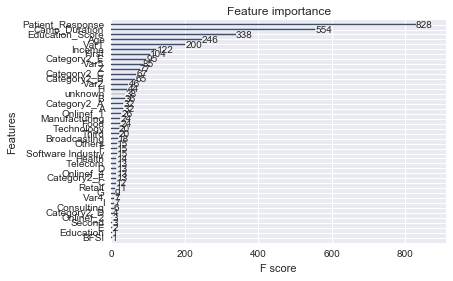

In [490]:
xgb.plot_importance(gbm)

In [491]:
gbm.evals_result


<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

In [492]:
gbm.feature_importances_

array([ 0.06027728,  0.01386377,  0.        ,  0.0021097 ,  0.02561784,
        0.16696805,  0.24954791,  0.03676914,  0.07414105,  0.10186859,
        0.00964436,  0.01084991,  0.00361664,  0.00391802,  0.00060277,
        0.0045208 ,  0.00271248,  0.013261  ,  0.0021097 ,  0.02320675,
        0.00030139,  0.00542495,  0.00180832,  0.00030139,  0.00723327,
        0.00421941,  0.00723327,  0.0045208 ,  0.        ,  0.00331525,
        0.0045208 ,  0.00602773,  0.00391802,  0.        ,  0.01145268,
        0.03134418,  0.00090416,  0.00602773,  0.00964436,  0.01959012,
        0.02019289,  0.00120555,  0.02863171,  0.00391802,  0.        ,
        0.        ,  0.00783605,  0.00090416,  0.        ,  0.00391802,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [493]:
gbm.base_score

0.5

In [494]:
from sklearn.cross_validation import cross_val_score
cross_val_score(xgb.XGBClassifier(n_estimators=100), train_features, train_output, cv=5)

array([ 0.80652232,  0.80738576,  0.81004251,  0.80512752,  0.80178026])

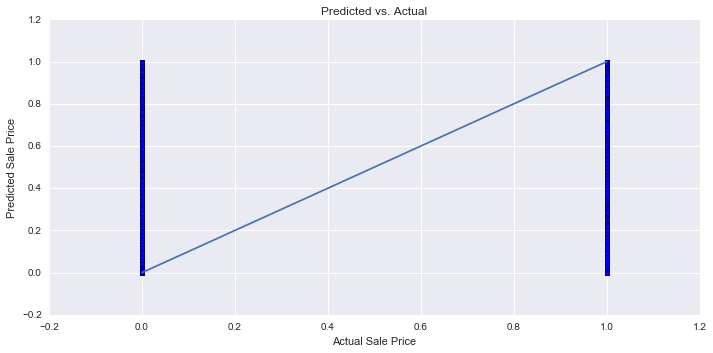

In [495]:


X_train1, X_test1, y_train1, y_test1 = train_test_split(train_features, train_output)
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

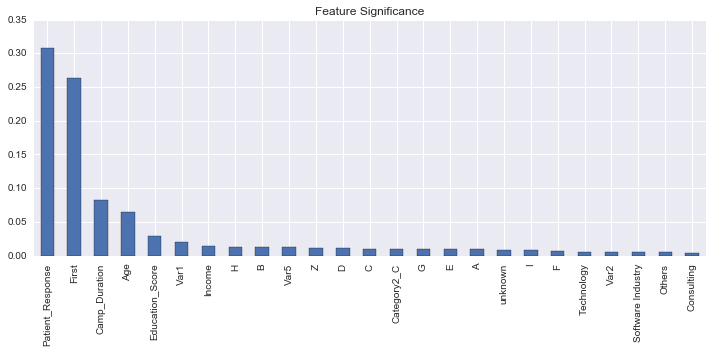

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Fit model with training data
clf.fit(train_features, train_output)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()